In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification

In [30]:
datasets = [
    ('Круги', make_circles(noise=0.2, factor=0.5, random_state=42)),
    ('Полумесяцы', make_moons(noise=0.2, random_state=42)),
    ('класс', make_classification(n_classes=3, n_clusters_per_class=1,
                                     n_features=2, class_sep=.8, random_state=3, n_redundant=0))
]

Круги: train=1.000, test=0.733, переобучение=0.267
Полумесяцы: train=1.000, test=0.867, переобучение=0.133
класс: train=1.000, test=0.833, переобучение=0.167


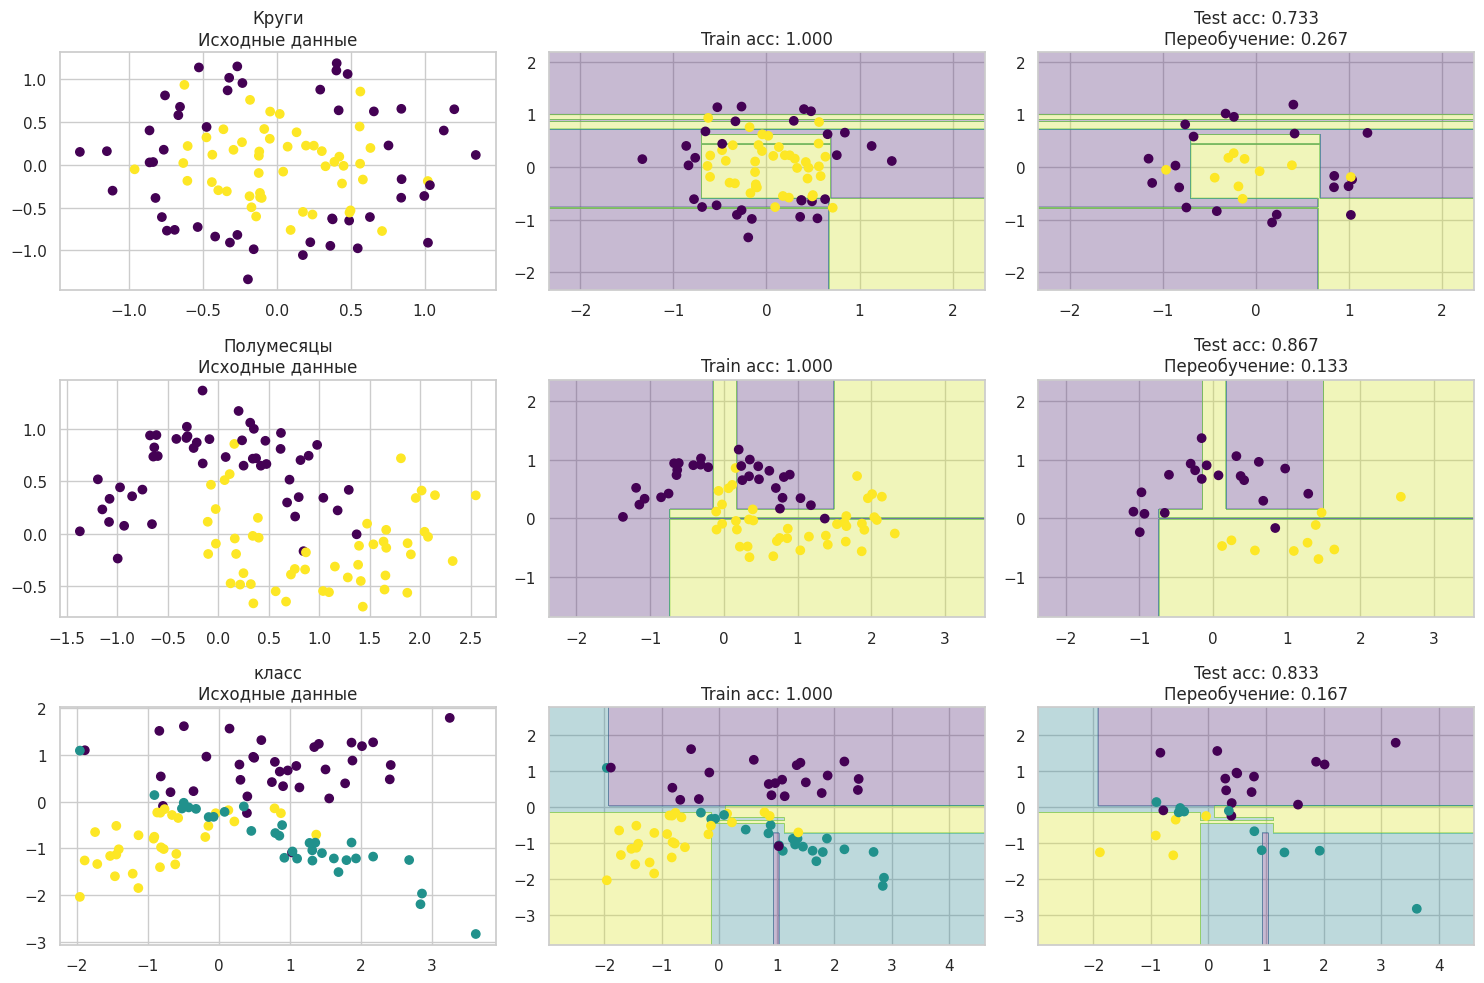

In [32]:
plt.figure(figsize=(15, 10))

for idx, (name, (X, y)) in enumerate(datasets):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)


    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))
    overfit = train_acc - test_acc


    print(f"{name}: train={train_acc:.3f}, test={test_acc:.3f}, переобучение={overfit:.3f}")


    plt.subplot(3, 3, idx*3 + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(f'{name}\nИсходные данные')


    plt.subplot(3, 3, idx*3 + 2)
    xx, yy = np.meshgrid(np.arange(X[:,0].min()-1, X[:,0].max()+1, 0.01),
                         np.arange(X[:,1].min()-1, X[:,1].max()+1, 0.01))
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
    plt.title(f'Train acc: {train_acc:.3f}')

    plt.subplot(3, 3, idx*3 + 3)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
    plt.title(f'Test acc: {test_acc:.3f}\nПереобучение: {overfit:.3f}')

plt.tight_layout()
plt.show()

In [33]:
X, y = datasets[0][1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
dt_original = DecisionTreeClassifier(random_state=42)
dt_original.fit(X_train, y_train)
train_acc_orig = accuracy_score(y_train, dt_original.predict(X_train))
test_acc_orig = accuracy_score(y_test, dt_original.predict(X_test))

In [35]:
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)

train_acc_lim = accuracy_score(y_train, dt_limited.predict(X_train))
test_acc_lim = accuracy_score(y_test, dt_limited.predict(X_test))

In [36]:
print(f"Круги с ограничением глубины:")
print(f"  Обучающая accuracy: {train_acc_lim:.4f} (было: {train_acc_orig:.4f})")
print(f"  Тестовая accuracy: {test_acc_lim:.4f} (было: {test_acc_orig:.4f})")
print(f"  Переобучение: {train_acc_lim-test_acc_lim:.4f} (было: {train_acc_orig-test_acc_orig:.4f})")

Круги с ограничением глубины:
  Обучающая accuracy: 0.8857 (было: 1.0000)
  Тестовая accuracy: 0.7333 (было: 0.7333)
  Переобучение: 0.1524 (было: 0.2667)
